**GEMINI API SETUP**

In [2]:
import os

In [3]:
!pip install -q -U google-generativeai

In [4]:
import pathlib
import textwrap
import google.generativeai as genai
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _:True))

In [5]:
os.environ['GOOGLE_API_KEY']=''
genai.configure(api_key=os.environ['GOOGLE_API_KEY'])
model = genai.GenerativeModel('gemini-pro')

**OCR**

In [1]:
!pip install surya-ocr

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
os.chdir('/content/drive/MyDrive/IR/Project_Reports')

In [8]:
files = os.listdir()
files = [file for file in files if not file.startswith('ocr')]
print(files)
files=['10-02-24.pdf', '19-08-22.pdf', '16-02-23.pdf', '21-02-22.pdf', '09-01-24.pdf', '22-03-22.pdf', '08-03-22.pdf', '08-12-23.pdf']

['10-02-24.pdf', '19-08-22.pdf', '16-02-23.pdf', '09-01-24.pdf', '22-03-22.pdf', '08-03-22.pdf', '08-12-23.pdf', '21-02-22.pdf', 'temp_script.py']


In [9]:
!pip install pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 62.5 MB/s eta 0:00:00


In [10]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (7,147 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [11]:
import pymupdf
import pytesseract as tess
from PIL import Image
from surya.ocr import run_ocr
from surya.model.detection import segformer
from surya.model.recognition.model import load_model as load_recognition_model
from surya.model.recognition.processor import load_processor as load_recognition_processor
import sys

In [12]:
det_processor, det_model = segformer.load_processor(), segformer.load_model()
rec_model, rec_processor = load_recognition_model(langs=['en']), load_recognition_processor()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/430 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/120M [00:00<?, ?B/s]

Loaded detection model vikp/surya_det2 on device cuda with dtype torch.float16


config.json:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.05G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

Loaded recognition model vikp/surya_rec on device cuda with dtype torch.float16


preprocessor_config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

In [13]:
base = '/content/drive/MyDrive/IR/Project_Reports'
texts = []
for file in files:

  input_path = os.path.join(base, file)
  pdf = pymupdf.open(file)
  print("File:", file)
  result = ''
  for image in pdf:
    image = image.get_pixmap(dpi=300)
    image = Image.frombytes("RGB", [image.width, image.height], image.samples)
    try:
      predictions = run_ocr(
        [image],
        [["en"]],
        det_model,
        det_processor,
        rec_model,
        rec_processor,
        batch_size=16,
      )


      result += "\n".join(
        [
            f"{i.text}"
            for i in predictions[0].text_lines
        ]
      )
    except:
      result = tess.image_to_string(image)
  texts.append(result)

File: 10-02-24.pdf


Detecting bboxes:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
Recognizing Text: 100%|██████████| 3/3 [00:05<00:00,  1.84s/it]


File: 19-08-22.pdf


Recognizing Text: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


File: 16-02-23.pdf


Recognizing Text: 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]


File: 21-02-22.pdf


Recognizing Text: 100%|██████████| 3/3 [00:04<00:00,  1.37s/it]


File: 09-01-24.pdf


Recognizing Text: 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


File: 22-03-22.pdf


Recognizing Text: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


File: 08-03-22.pdf


Recognizing Text:   0%|          | 0/4 [00:00<?, ?it/s]


File: 08-12-23.pdf


Recognizing Text: 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]


**Pre-Processing**

In [14]:
examples = [{
    "text": '''Reg. No. 7648 (Uttaranchal Medical Council)
Mo.:- 9412296731
Clinic: Hill view colony Kanjabag Road, Khatima, U.S. Nagar (UK)
Dr. S.S.Bora
Life Member Indian Radiological And Imaging Association
M.B.B.S. DMRE
Life Member Indian Federation of Ultrasound in Medicine & Biology
Physician and Radiologist
NAME OF PATIENT :-
SEX/AGE :- 35 Y/F
PART-SCANNED
:- WHOLE ABDOMEN
DATE :- 08/03/2022
REFERRED BY
:- SELF
ULTRASOUND FINDINGS
DIAPHRAGM :-  Contour is well defined & normal in shape.

:- Normal in size with homogeneous echotexture. The intrahepatic biliary
LIVER
channels are normal in calibre. No cystic or solid mass lesion seen.
GALL BLADDER : - Well visualized, Moderately distended with thikened and edematous walls
(0.59cm near neck). The lumen is showing a small heap of faintly shaodwing
echogenic focii collected together in an area of 2.06cm over the posterior
wall near fundus and is casting fant DAS.
C.B.D.
:- The proximal part is dilated  (0.92cm ) and is distal part is normal
(0.52cm) with anechoic lumen
SPLEEN
:- Normal in size with homogeneous echotexture .
PANCREAS  :- Normal in shape, size and echotexture. The pancreatic  duct is normal.
No cysitic or solid mass lesion  seen.
KIDNEY
Both kidneys are well visualized, normal in size, shape and position.
The pelvicalyceal system is normal. The corticomedullary demarcation
is well defined. No calculus, cyst or mass lesion seen.
U/ BLADDER :-Moderately filled with normal wall thickeness. The lumen is anechoic,
UTERUS    :-Well visualized, normal in size and anteverted with homogeneous
myometrial  echotexture. The endometrial echoes are normal. The cervix
and vagina are normal. No focal mass lesion seen.
CUL-DE-SAC- No collection is seen. No solid or cystic mass lesion seen.
ADNEXA
 :-  both ovaries could not be picked up.
OPINION :- Sonographic findings are consistent with mild Acute stage
calculus cholecystitis (micro calculii).
NOTE- Confirmation of diagnosis may required second opinion.
Kindly co-relate clinically and other modality wise also
Sizes shown in the report may vary in every scan.
SONOLOGIST''',
    "output": '''
DATE :- 08/03/2022

ULTRASOUND FINDINGS

DIAPHRAGM: Contour is well defined & normal in shape.

LIVER: Normal in size with homogeneous echotexture. The intrahepatic biliary channels are normal in calibre. No cystic or solid mass lesion seen.

GALL BLADDER: Well visualized, moderately distended with thickened and edematous walls (0.59 cm near neck). The lumen is showing a small heap of faintly shadowing echogenic foci collected together in an area of 2.06 cm over the posterior wall near fundus and is casting faint DAS.

C.B.D.: The proximal part is dilated (0.92 cm) and the distal part is normal (0.52 cm) with anechoic lumen.

SPLEEN: Normal in size with homogeneous echotexture.

PANCREAS: Normal in shape, size and echotexture. The pancreatic duct is normal. No cystic or solid mass lesion seen.

KIDNEYS: Both kidneys are well visualized, normal in size, shape and position. The pelvicalyceal system is normal. The corticomedullary demarcation is well defined. No calculus, cyst or mass lesion seen.

U. BLADDER: Moderately filled with normal wall thickness. The lumen is anechoic.

UTERUS: Well visualized, normal in size and anteverted with homogeneous myometrial echotexture. The endometrial echoes are normal. The cervix and vagina are normal. No focal mass lesion seen.

CUL-DE-SAC: No collection is seen. No solid or cystic mass lesion seen.

ADNEXA: Both ovaries could not be picked up.'''
}]

In [15]:
pre_prompt = "We would be given this type of texts in medical reports we have to remove unnecessary header and footers. Headers are upto the keyword 'Ultra', 'Ultrasound', or 'findings' and footers start from when all organs are covered(Before any 'OPINION' or 'IMPRESSION' or 'NOTE'. Don't remove DATE from header"+ f" {examples[0]}"

In [16]:
processed_texts = []

for i in texts:
    try:
        response = model.generate_content(pre_prompt + " Now based on above example remove the header and footer for this input as well and return the output: text:" + i)
        processed_texts.append(response.text)
    except Exception as e:
        print(f"An error occurred while generating content for text: {i[:30]}... : {e}")

In [17]:
to_markdown(texts[3])

> Clinic: Hill view colony Kanjabag Road, Khatima, U.S. Nagar (UK)
> the c
> Dr. S.S.Bora
> Life Member Indian Radiological And Imaging Association
> Life Member Indian Federation of Ultrasound in Medicine & Biology
> M.B.B.S. DMRE
> |NAME OF PATIENT :-
> Physician and Radiologist
> SEX/AGE :- 37Y/F
> |PART-SCANNED
> :- WHOLE ABDOMEN
> DATE :- 21/02/2022
> |REFERRED BY
> :- SELF
> ULTRASOUND FINDINGS
> DIAPHRAGM :-  Contour is well defined & normal in shape.
> :- Normal in size with homogeneous echotexture. The intrahepatic biliary
> LIVER
> channels are normal in calibre. No cystic or solid mass lesion seen.
> GALL BLADDER : - Well visualized, Moderately distended with  thickened and edematous
> wall (0.68cm). The lumen is showing multiple tiny, freely mobile, echogenic
> focii collectively casting faint DAS seen collected over the posterior wall.
> C.B.D.
> :- Normal in wall thickeness  and calibre  with anechoic lumen.
> SPLEEN
> :- Normal in size with homogeneous echotexture .
> PANCREAS  :- Normal in shape, size and echotexture. The pancreatic  duct is normal.
> No cysitic or solid mass lesion  seen.
> KIDNEY
> Both kidneys are well visualized, normal in size, shape and position.
> The pelvicalyceal system is normal. The corticomedullary demarcation
> is well defined. No calculus, cyst or mass lesion seen.
> U/ BLADDER :-Scantly filled with normal wall thickeness.The lumen is anechoic.
> :-Well visualized, normal in size and anteverted with homogeneous
> UTERUS
> myometrial  echotexture. The endometrial echoes are normal. The cervix
> and vagina are normal. No focal mass lesion seen.
> CUL-DE-SAG- No collection is seen. No solid or cystic mass lesion seen.
>  :-  both ovaries could not be picked up.
> ADNEXA.
> OPINION:- Sonographic findings are consistent with Acutre stage
> calculus cholecystitis.
> NOTE- Confirmation of diagnosis may required second opinion.
> Kindly co-relate clinically and other modality wise also
> Sizes shown in the report may vary in every scan. 

In [18]:
to_markdown(processed_texts[3])

> DATE :- 21/02/2022
> ULTRASOUND FINDINGS
> DIAPHRAGM :-  Contour is well defined & normal in shape.
> :- Normal in size with homogeneous echotexture. The intrahepatic biliary
> LIVER
> channels are normal in calibre. No cystic or solid mass lesion seen.
> GALL BLADDER : - Well visualized, Moderately distended with  thickened and edematous
> wall (0.68cm). The lumen is showing multiple tiny, freely mobile, echogenic
> focii collectively casting faint DAS seen collected over the posterior wall.
> C.B.D.
> :- Normal in wall thickeness  and calibre  with anechoic lumen.
> SPLEEN
> :- Normal in size with homogeneous echotexture .
> PANCREAS  :- Normal in shape, size and echotexture. The pancreatic  duct is normal.
> No cysitic or solid mass lesion  seen.
> KIDNEY
> Both kidneys are well visualized, normal in size, shape and position.
> The pelvicalyceal system is normal. The corticomedullary demarcation
> is well defined. No calculus, cyst or mass lesion seen.
> U/ BLADDER :-Scantly filled with normal wall thickeness.The lumen is anechoic.
> :-Well visualized, normal in size and anteverted with homogeneous
> UTERUS
> myometrial  echotexture. The endometrial echoes are normal. The cervix
> and vagina are normal. No focal mass lesion seen.
> CUL-DE-SAG- No collection is seen. No solid or cystic mass lesion seen.
>  :-  both ovaries could not be picked up.
> ADNEXA.

**Exhaustive List of Organs & Their Features in Ultrasound Reports**

In [19]:
list1 = {
    "date": "<date of examination>",
    "diaphragm": {"shape": None, "contour": None},
    "liver": {
        "size": None,
        "echo-texture": None,
        "intra hepatic biliary channels": None,
        "cystic or solid mass lesion": None,
        "surface contour": None,
        "vascular structures": None,
        "presence of lesions or nodules": None
    },
    "gall bladder": {
        "visualized": None,
        "size(in mm)": None,
        "wall thickness": None,
        "lumen contents": None,
        "presence of stones (calculi)": None,
        "desc": None
    },
    "cbd": {
        "wall thickness": None,
        "measurement(in mm)": None,
        "lumen contents": None,
        "presence of stones (calculi)": None,
        "desc": None
    },
    "pancreas": {
        "size": None,
        "echo-texture": None,
        "pancreatic duct": None,
        "cystic or solid mass lesion": None,
        "contour": None
    },
    "spleen": {
        "size": None,
        "echo-texture": None,
        "surface contour": None,
        "presence of lesions or nodules": None
    },
    "kidneys": {
        "size": None,
        "cortico-medullary echoes": None,
        "location": None,
        "collecting system": None,
        "presence of cysts or mass lesions": {
            "size(in mm2)": None,
            "location": None
        },
        "pelvicalyceal system": None,
        "ureteral dilatation": None
    },
    "urinary bladder": {
        "wall thickness": None,
        "lumen": None,
        "distension": None,
        "presence of mass lesions or calculi": None
    },
    "uterus": {
        "measurement (in mm3)": None,
        "position": None,
        "myometrium echo-pattern": None,
        "endometrial thickness(in mm)": None,
        "presence of fibroids or lesions": None
    },
    "adnexa (ovaries)": {
        "size": None,
        "echo-texture": None,
        "presence of cysts or mass lesions": None,
        "follicular activity": None
    },
    "prostate (in males)": {
        "size": None,
        "echo-texture": None,
        "presence of nodules or lesions": None,
        "post-void residual volume": None
    },
    "bowels": {
        "wall thickness": None,
        "peristalsis": None,
        "presence of mass lesions": None,
        "lumen contents": None
    },
    "major blood vessels (aorta, IVC)": {
        "diameter": None,
        "presence of aneurysms or dilatation": None,
        "wall characteristics": None,
        "flow patterns": None
    }
}


**Feature Extraction**

In [20]:
examples=[{
            "text": f"{files[7]} {processed_texts[7].lower()}",

            "output": {
                'date': '08/12/2023',
                'diaphragm': {'shape': None, 'contour': None},
                'liver': {'size': 'normal', 'echo-texture': 'normal', 'intra hepatic biliary channels': 'dilated', 'cystic or solid mass lesion': None},
                'gall bladder': {'visualized': True, 'size(in mm)': 5.9, 'desc': 'h/o cholecystectomy, gradual tapering is seen, a non-obstructive calculus of approx. size 5.9 mm is seen in distal part'},
                'cbd': {'wall_thickness': 'dilated', 'measurement(in mm)': 10.2, 'desc': None},
                'pancreas': {'size': 'mildly bulky', 'echo-texture': 'homogeneous', 'pancreatic duct': None, 'cystic or solid mass lesion': None},
                'spleen': {'size': 'normal', 'echo-texture': 'homogeneous'},
                'kidneys': {'size': 'normal', 'cortico-medullary echoes': 'normal', 'location': 'normally sited', 'collecting system': 'No Dilation',
                            'cyst': {'size(in mm2)': '13 x 12', 'location': 'lower pole of left kidney'},
                            'pelvicalyceal system': None},
                'urinary bladder': {'lumen': 'clear', 'desc': 'partially distended'},
                'uterus': {'measurement (in mm3)': '77 x 43 x 47', 'desc': 'anteverted, myometrium shows normal echo-pattern'},
                'endometrial thickness(in mm)': 7.8,
                'cul-de-sag': None,
                'adnexa': 'both ovaries are visualised and normal'
            }
        },
        {
            "text": f"{files[3]} {processed_texts[3].lower()}",

            "output": {
                'date': '21/02/2022',
                'diaphragm': {'shape': 'normal', 'contour': 'well defined'},
                'liver': {'size': 'normal', 'echo-texture': 'homogeneous', 'intra hepatic biliary channels': 'normal', 'cystic or solid mass lesion': 'No'},
                'gall bladder': {'visualized': True, 'size(in mm)': 6.8, 'desc': 'moderately distended with thickened and edematous wall (0.68cm). the lumen is showing multiple tiny, freely mobile, echogenic focii collectively casting faint das seen collected over the posterior wall.'},
                'cbd': {'wall_thickness': 'normal', 'measurement(in mm)': None, 'desc': 'calibre with anechoic lumen'},
                'pancreas': {'size': 'normal', 'echo-texture': 'normal', 'pancreatic duct': 'normal', 'cystic or solid mass lesion': 'No'},
                'spleen': {'size': 'normal', 'echo-texture': 'homogeneous'},
                'kidneys': {'size': 'normal', 'cortico-medullary echoes': 'well defined', 'location': 'normally sited', 'collecting system': None,
                            'cyst': {'size(in mm2)': None, 'location': None},
                            'pelvicalyceal system': 'normal'},
                'urinary bladder': {'lumen': 'anechoic', 'size': 'normal', 'desc': 'scantly filled with normal wall thickeness'},
                'uterus': {'measurement (in mm3)': None, 'desc': 'anteverted, homogeneous myometrial echotexture, the endometrial echoes are normal, the cervix and vagina are normal. no focal mass lesion seen' },
                'endometrial thickness(in mm)': 'normal',
                'cul-de-sag': 'no collection is seen. no solid or cystic mass lesion seen',
                'adnexa': 'both ovaries could not be picked up'
            }
        }
      ]

**Using Exhaustive List as Prompt directly to the Gen AI**

In [21]:
import time
import requests

responses1 = []
pre_prompt = f"Fill in the output values of the below dictionary by extracting out the following features from input text. Features: {list1} Examples(Don't Copy Them){examples[0]} {examples[1]}. Also for dictionary there should be no syntax error. Proper opening and closing of brackets"
for i in range(len(processed_texts)):
    retry_count = 5  # Number of retries
    backoff_factor = 1  # Factor for exponential backoff

    while retry_count > 0:
        try:
            input_text = processed_texts[i].lower()
            print(files[i])
            response = model.generate_content(
                pre_prompt +
                " Now based on above exhaustive list extract the text from the input with output format as the dictornary with keys as the list parametes also for numeric value(feature example: size, measurement) it should be float(with only units mentioned. example: 'mm' or 'cm') and the values with 12 x 9 should be converted to numeric values as 108(product of 12 and 9): text: " +
                f"{input_text}"
            )
            responses1.append(response.text)
            break  # Exit the retry loop on success
        except requests.exceptions.Timeout as e:
            retry_count -= 1
            if retry_count == 0:
                print(f"An error occurred while generating content for text: {processed_texts[i][:30]}... : {e}")
            else:
                wait_time = backoff_factor * (2 ** (5 - retry_count))
                print(f"Timeout error. Retrying in {wait_time} seconds...")
                time.sleep(wait_time)
        except Exception as e:
            print(f"An error occurred while generating content for text: {processed_texts[i][:30]}... : {e}")
            break  # Exit the retry loop on non-timeout errors

10-02-24.pdf
19-08-22.pdf
16-02-23.pdf
21-02-22.pdf
09-01-24.pdf
22-03-22.pdf
08-03-22.pdf
08-12-23.pdf


In [22]:
to_markdown(responses1[0])
for response in responses1:
  print(response)

{'date': '10/02/2024', 'diaphragm': {'shape': None, 'contour': None}, 'liver': {'size': 'normal', 'echo-texture': 'normal', 'intra hepatic biliary channels': 'dilated', 'cystic or solid mass lesion': None, 'surface contour': None, 'vascular structures': None, 'presence of lesions or nodules': None}, 'gall bladder': {'visualized': False, 'size(in mm)': None, 'wall thickness': None, 'lumen contents': None, 'presence of stones (calculi)': None, 'desc': 'h/o hysterectomy'}, 'cbd': {'wall thickness': None, 'measurement(in mm)': 8.0, 'lumen contents': None, 'presence of stones (calculi)': False, 'desc': 'no obvious focal lesion is seen intra-luminally, gradual tapering is seen'}, 'pancreas': {'size': 'normal', 'echo-texture': 'normal', 'pancreatic duct': None, 'cystic or solid mass lesion': None, 'contour': 'normal'}, 'spleen': {'size': 'normal', 'echo-texture': 'normal', 'surface contour': None, 'presence of lesions or nodules': None}, 'kidneys': {'size': 'normal', 'cortico-medullary echoes

**Dataframe Creation**

In [23]:
import pandas as pd
import regex as re
def extract_date_from_filename(filename):
  """Extracts the date in DD-MM-YY format from a filename, handling potential errors.

  Args:
      filename (str): The filename to extract the date from.

  Returns:
      str: The extracted date in DD-MM-YY format, or None if no valid date is found.
  """

  # Improved regular expression pattern for flexibility
  date_pattern = r"(\d{2})-(\d{2})-(\d{2})(?:\.pdf|\.docx?)?"

  match = re.search(date_pattern, filename)
  if match:
    day, month, year = match.groups()
    return f"{day}-{month}-{year}"
  else:
    return None

In [24]:
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [26]:
import ast
exam_dates = []
dfs = []
for i, response in enumerate(responses1):
  try:
    try:
      organ_data = ast.literal_eval(response)
    except:
      continue
    print(organ_data)
    flat_dict = flatten_dict(organ_data)
    df = pd.DataFrame([flat_dict])
    dfs.append(df)
    exam_dates.append(extract_date_from_filename(files[i]))
  except ValueError as e:
        print(f"Error parsing response for file {files[i]}: {e}")

{'date': '10/02/2024', 'diaphragm': {'shape': None, 'contour': None}, 'liver': {'size': 'normal', 'echo-texture': 'normal', 'intra hepatic biliary channels': 'dilated', 'cystic or solid mass lesion': None, 'surface contour': None, 'vascular structures': None, 'presence of lesions or nodules': None}, 'gall bladder': {'visualized': False, 'size(in mm)': None, 'wall thickness': None, 'lumen contents': None, 'presence of stones (calculi)': None, 'desc': 'h/o hysterectomy'}, 'cbd': {'wall thickness': None, 'measurement(in mm)': 8.0, 'lumen contents': None, 'presence of stones (calculi)': False, 'desc': 'no obvious focal lesion is seen intra-luminally, gradual tapering is seen'}, 'pancreas': {'size': 'normal', 'echo-texture': 'normal', 'pancreatic duct': None, 'cystic or solid mass lesion': None, 'contour': 'normal'}, 'spleen': {'size': 'normal', 'echo-texture': 'normal', 'surface contour': None, 'presence of lesions or nodules': None}, 'kidneys': {'size': 'normal', 'cortico-medullary echoes

In [27]:
df_combined = pd.concat(dfs, ignore_index=True)
df_combined.head(8)

,date,diaphragm_shape,diaphragm_contour,liver_size,liver_echo-texture,liver_intra hepatic biliary channels,liver_cystic or solid mass lesion,liver_surface contour,liver_vascular structures,liver_presence of lesions or nodules,...,output_bowels_wall thickness,output_bowels_peristalsis,output_bowels_presence of mass lesions,output_bowels_lumen contents,"output_major blood vessels (aorta, IVC)_diameter","output_major blood vessels (aorta, IVC)_presence of aneurysms or dilatation","output_major blood vessels (aorta, IVC)_wall characteristics","output_major blood vessels (aorta, IVC)_flow patterns",gall bladder_presence of stones (calculi)_size(in mm),gall bladder_presence of stones (calculi)_location
0,10/02/2024,None,None,normal,normal,dilated,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19/08/2022,None,None,161.0,mildly increased,not dilated,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21/02/2022,normal,well defined,normal,homogeneous,normal,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,normal,well defined,normal,homogeneous,normal,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,No,None,None,None,None,None,NaN,NaN
5,None,None,None,normal,normal,dilated,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,dīstal


**Data Cleaning**

In [36]:
exam_dates
def convert_date(date_str):
    # Split the date string into year, month, and day
    parts = date_str.split('-')

    # Extract year, month, and day
    year = parts[2]
    month = parts[1]
    day = parts[0]

    year = '20'+year

    # Form the new date string in DD/MM/YYYY format
    return f'{month}/{day}/{year}'
converted_exam_dates = []
for date in exam_dates:
  date = convert_date(date)
  converted_exam_dates.append(date)
converted_exam_dates

['02/10/2024',
 '08/19/2022',
 '02/21/2022',
 '03/22/2022',
 '03/08/2022',
 '12/08/2023']

In [38]:
for i in range(len(exam_dates)):
  df_combined.iloc[i,0] = pd.to_datetime(converted_exam_dates[i], errors='coerce')

In [80]:
df_combined.head(8)

,date,diaphragm_shape,diaphragm_contour,liver_size,liver_echo-texture,liver_intra hepatic biliary channels,liver_cystic or solid mass lesion,liver_surface contour,liver_vascular structures,liver_presence of lesions or nodules,...,output_bowels_peristalsis,output_bowels_presence of mass lesions,output_bowels_lumen contents,"output_major blood vessels (aorta, IVC)_diameter","output_major blood vessels (aorta, IVC)_presence of aneurysms or dilatation","output_major blood vessels (aorta, IVC)_wall characteristics","output_major blood vessels (aorta, IVC)_flow patterns",gall bladder_presence of stones (calculi)_size(in mm),gall bladder_presence of stones (calculi)_location,
0,2024-02-10 00:00:00,None,None,normal,normal,dilated,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-19 00:00:00,None,None,161.0,mildly increased,not dilated,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.0
2,2022-02-21 00:00:00,normal,well defined,normal,homogeneous,normal,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-03-22 00:00:00,normal,well defined,normal,homogeneous,normal,no,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,No,None,None,None,None,None,NaN,NaN,NaN
5,2023-12-08 00:00:00,None,None,normal,normal,dilated,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9,dīstal,NaN


In [99]:
keywords = ['date', 'size', 'measurement', 'thickness']
filtered_columns = [col for col in df_combined.columns if any(keyword in col for keyword in keywords)]
new_df = df_combined[filtered_columns]

In [108]:
new_df.head(8)

,date,liver_size,gall bladder_size(in mm),gall bladder_wall thickness,cbd_wall thickness,cbd_measurement(in mm),pancreas_size,spleen_size,kidneys_size,kidneys_presence of cysts or mass lesions_size(in mm2),...,output_spleen_size,output_kidneys_size,output_kidneys_presence of cysts or mass lesions_size(in mm2),output_urinary bladder_wall thickness,output_uterus_measurement (in mm3),output_uterus_endometrial thickness(in mm),output_adnexa (ovaries)_size,output_prostate (in males)_size,output_bowels_wall thickness,gall bladder_presence of stones (calculi)_size(in mm)
0,2024-02-10 00:00:00,normal,NaN,None,None,8.00,normal,normal,normal,13 x 12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-19 00:00:00,161.0,NaN,None,None,6.90,normal,normal,normal,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-21 00:00:00,normal,6.8,NaN,NaN,NaN,normal,normal,normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-03-22 00:00:00,normal,NaN,slightly thickened,None,0.74,normal,normal,normal,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,normal,normal,None,normal,None,None,None,None,None,NaN
5,2023-12-08 00:00:00,normal,NaN,None,dilated,10.20,mild bulky,normal,normal,108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9


In [109]:
new_df_cleaned = new_df.dropna(axis=1, how='all')
new_df_cleaned.head(8)

,date,liver_size,gall bladder_size(in mm),gall bladder_wall thickness,cbd_wall thickness,cbd_measurement(in mm),pancreas_size,spleen_size,kidneys_size,kidneys_presence of cysts or mass lesions_size(in mm2),...,endometrial thickness(in mm),output_liver_size,output_gall bladder_size(in mm),output_gall bladder_wall thickness,output_cbd_measurement(in mm),output_pancreas_size,output_spleen_size,output_kidneys_size,output_urinary bladder_wall thickness,gall bladder_presence of stones (calculi)_size(in mm)
0,2024-02-10 00:00:00,normal,NaN,None,None,8.00,normal,normal,normal,13 x 12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-19 00:00:00,161.0,NaN,None,None,6.90,normal,normal,normal,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-21 00:00:00,normal,6.8,NaN,NaN,NaN,normal,normal,normal,NaN,...,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-03-22 00:00:00,normal,NaN,slightly thickened,None,0.74,normal,normal,normal,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,normal,2.06,0.59,0.92,normal,normal,normal,normal,NaN
5,2023-12-08 00:00:00,normal,NaN,None,dilated,10.20,mild bulky,normal,normal,108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.9


In [110]:
threshold = len(new_df_cleaned) / 2
nan_counts = new_df_cleaned.isna().sum()
columns_to_keep = nan_counts[nan_counts <= threshold].index
new_df_cleaned = new_df_cleaned[columns_to_keep]
new_df_cleaned.head(6)

,date,liver_size,cbd_measurement(in mm),pancreas_size,spleen_size,kidneys_size,kidneys_presence of cysts or mass lesions_size(in mm2),uterus_endometrial thickness(in mm)
0,2024-02-10 00:00:00,normal,8.00,normal,normal,normal,13 x 12,3.0
1,2022-08-19 00:00:00,161.0,6.90,normal,normal,normal,108.0,3.9
2,2022-02-21 00:00:00,normal,NaN,normal,normal,normal,NaN,NaN
3,2022-03-22 00:00:00,normal,0.74,normal,normal,normal,None,normal
4,2022-03-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-12-08 00:00:00,normal,10.20,mild bulky,normal,normal,108,7.8


In [111]:
def unit_conversion(col):
    mean_val = col.mean()
    std_val = col.std()
    def convert_outlier(val):
        if pd.notna(val) and (val-mean_val<0) and (abs(val - mean_val) >  std_val):
            # Assume the conversion factor is 10 for simplicity; this can be adjusted as needed
            return float(val * 10)
        elif pd.notna(val) and (val-mean_val>0) and (abs(val - mean_val) > std_val):
            # Assume the conversion factor is 10 for simplicity; this can be adjusted as needed
            return float(val / 10)
        return float(val)

    return col.apply(convert_outlier)

In [112]:
# Taking assumption of the particular patient Age = 35 Gender = Female
liver_normal_size = 137.0
uterus_endometrial_thickness_normal = 3.0
def convert_normal_and_units(val, col_name):
    if isinstance(val, str):
        val_lower = val.lower()
        if col_name == 'liver_size' and val_lower == 'normal':
            return liver_normal_size
        elif col_name == 'uterus_endometrial thickness(in mm)' and val_lower == 'normal':
            return uterus_endometrial_thickness_normal
        elif 'x' in val_lower:
            # Handle multiplication strings like "13 x 12"
            factors = val_lower.split('x')
            return float(factors[0].strip()) * float(factors[1].strip())
    return val

In [113]:
import numpy as np
numeric_cols = new_df_cleaned.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(col)
    new_df_cleaned[col] = unit_conversion(new_df_cleaned[col])

cbd_measurement(in mm)


In [114]:
for col in new_df_cleaned.columns:
    new_df_cleaned[col] = new_df_cleaned[col].apply(lambda x: convert_normal_and_units(x, col))

In [115]:
new_df_cleaned.head(6)

,date,liver_size,cbd_measurement(in mm),pancreas_size,spleen_size,kidneys_size,kidneys_presence of cysts or mass lesions_size(in mm2),uterus_endometrial thickness(in mm)
0,2024-02-10,137.0,8.0,normal,normal,normal,156.0,3.0
1,2022-08-19,161.0,6.9,normal,normal,normal,108.0,3.9
2,2022-02-21,137.0,NaN,normal,normal,normal,NaN,NaN
3,2022-03-22,137.0,7.4,normal,normal,normal,NaN,3.0
4,2022-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-12-08,137.0,10.2,mild bulky,normal,normal,108.0,7.8


**Plotting Numerical Values**

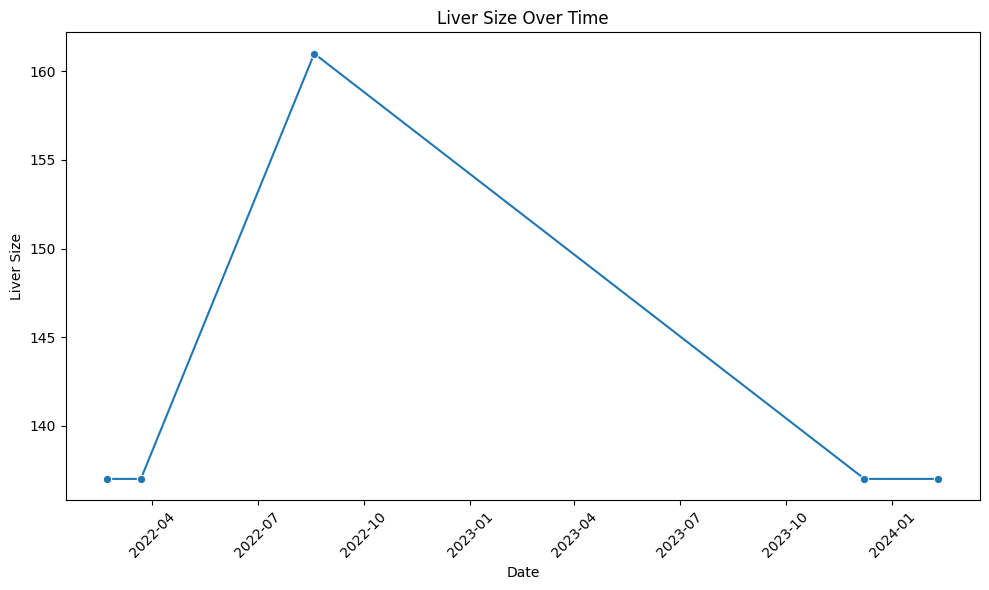

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

new_df_cleaned['liver_size'] = pd.to_numeric(new_df_cleaned['liver_size'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.lineplot(data=new_df_cleaned, x='date', y='liver_size', marker='o')
plt.title('Liver Size Over Time')
plt.xlabel('Date')
plt.ylabel('Liver Size(in mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

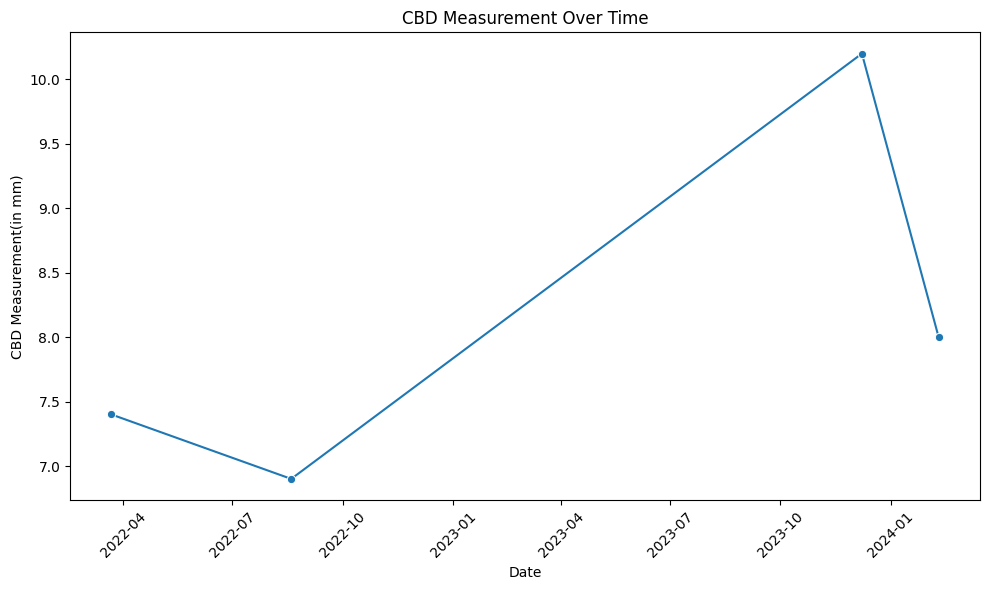

In [117]:
new_df_cleaned['cbd_measurement(in mm)'] = pd.to_numeric(new_df_cleaned['cbd_measurement(in mm)'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.lineplot(data=new_df_cleaned, x='date', y='cbd_measurement(in mm)', marker='o')
plt.title('CBD Measurement Over Time')
plt.xlabel('Date')
plt.ylabel('CBD Measurement(in mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

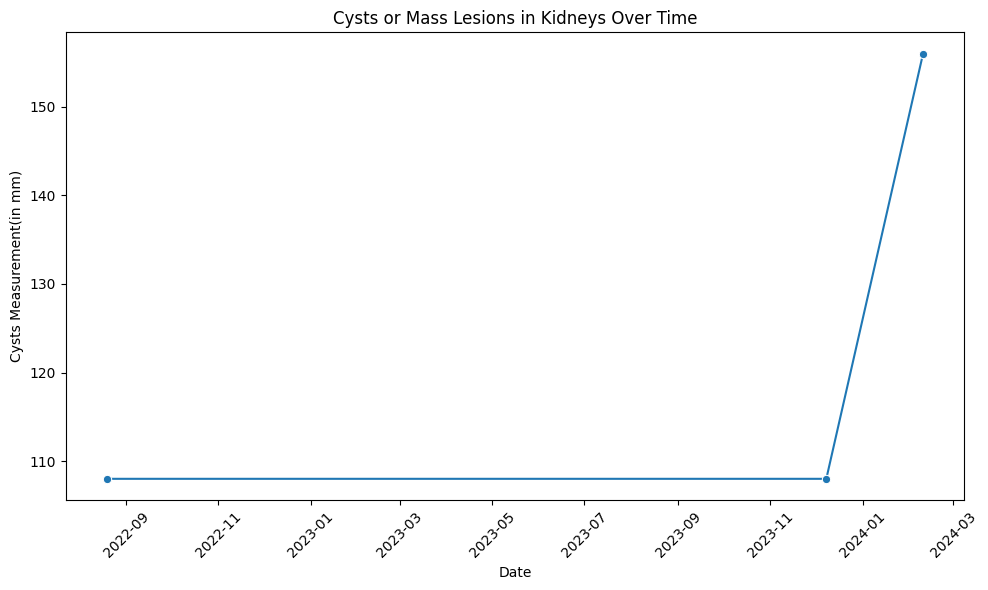

In [120]:
new_df_cleaned['kidneys_presence of cysts or mass lesions_size(in mm2)'] = pd.to_numeric(new_df_cleaned['kidneys_presence of cysts or mass lesions_size(in mm2)'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.lineplot(data=new_df_cleaned, x='date', y='kidneys_presence of cysts or mass lesions_size(in mm2)', marker='o')
plt.title('Cysts or Mass Lesions in Kidneys Over Time')
plt.xlabel('Date')
plt.ylabel('Cysts Measurement(in mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

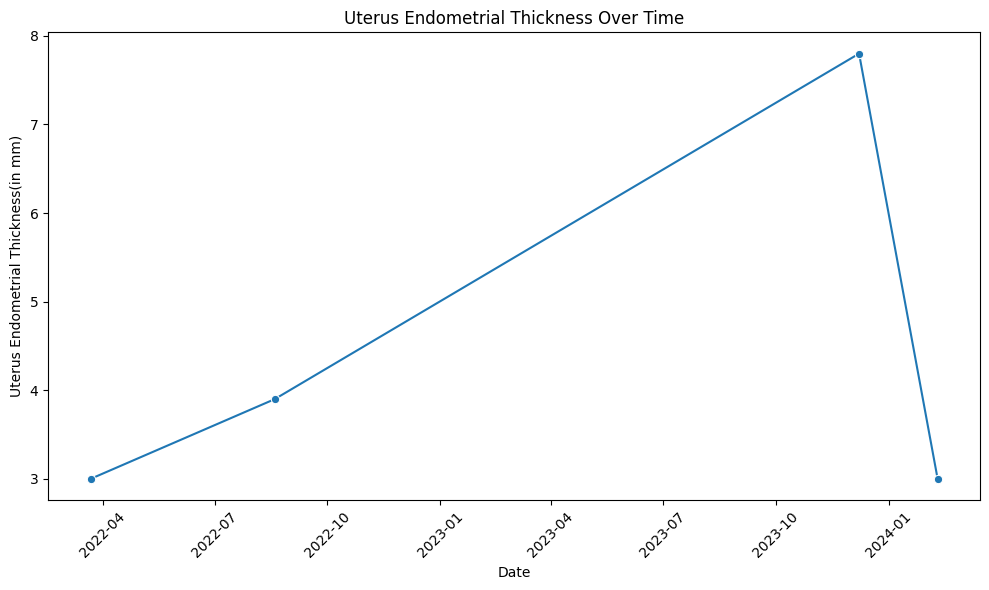

In [121]:
new_df_cleaned['uterus_endometrial thickness(in mm)'] = pd.to_numeric(new_df_cleaned['uterus_endometrial thickness(in mm)'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.lineplot(data=new_df_cleaned, x='date', y='uterus_endometrial thickness(in mm)', marker='o')
plt.title('Uterus Endometrial Thickness Over Time')
plt.xlabel('Date')
plt.ylabel('Uterus Endometrial Thickness(in mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Visualising Categorical Values**

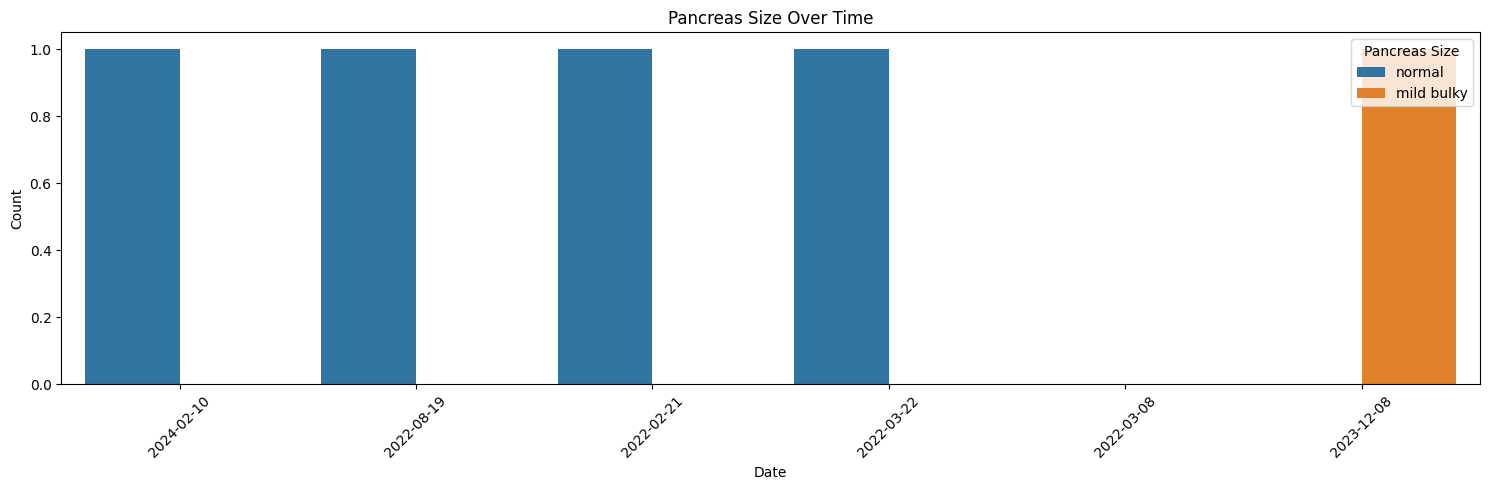

In [131]:
# Set up the plot
plt.figure(figsize=(15, 5))

# Plot each categorical column with respect to date

sns.countplot(data=new_df_cleaned, x='date', hue='pancreas_size')
plt.title(f'Pancreas Size Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Pancreas Size')

plt.tight_layout()
plt.show()

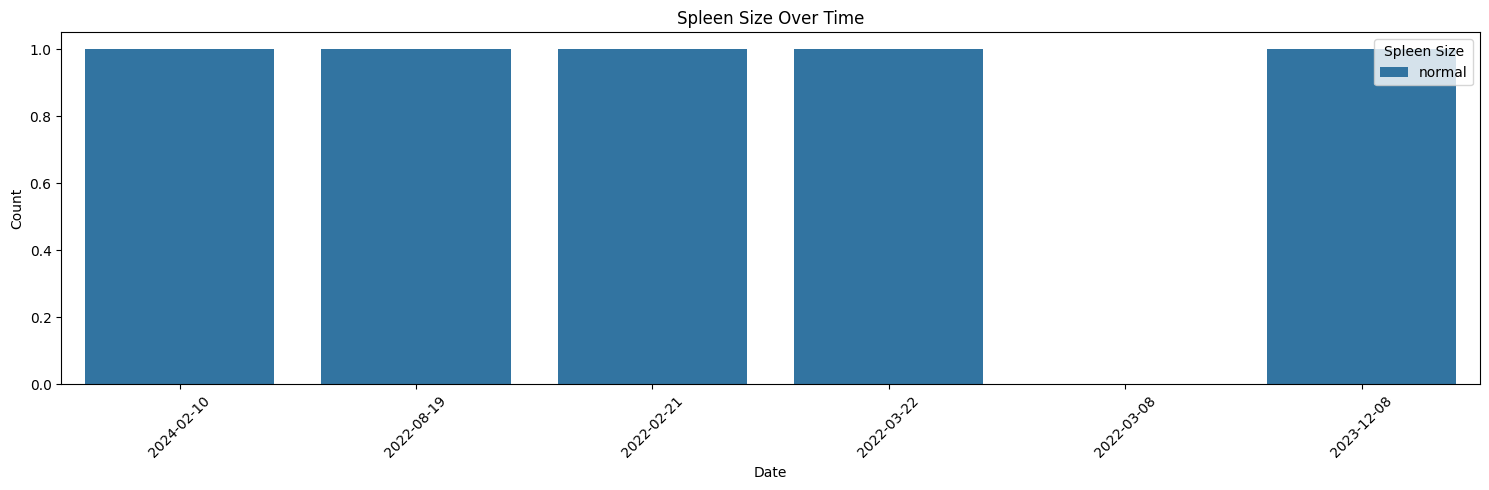

In [132]:
# Set up the plot
plt.figure(figsize=(15, 5))

# Plot each categorical column with respect to date

sns.countplot(data=new_df_cleaned, x='date', hue='spleen_size')
plt.title(f'Spleen Size Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Spleen Size')

plt.tight_layout()
plt.show()

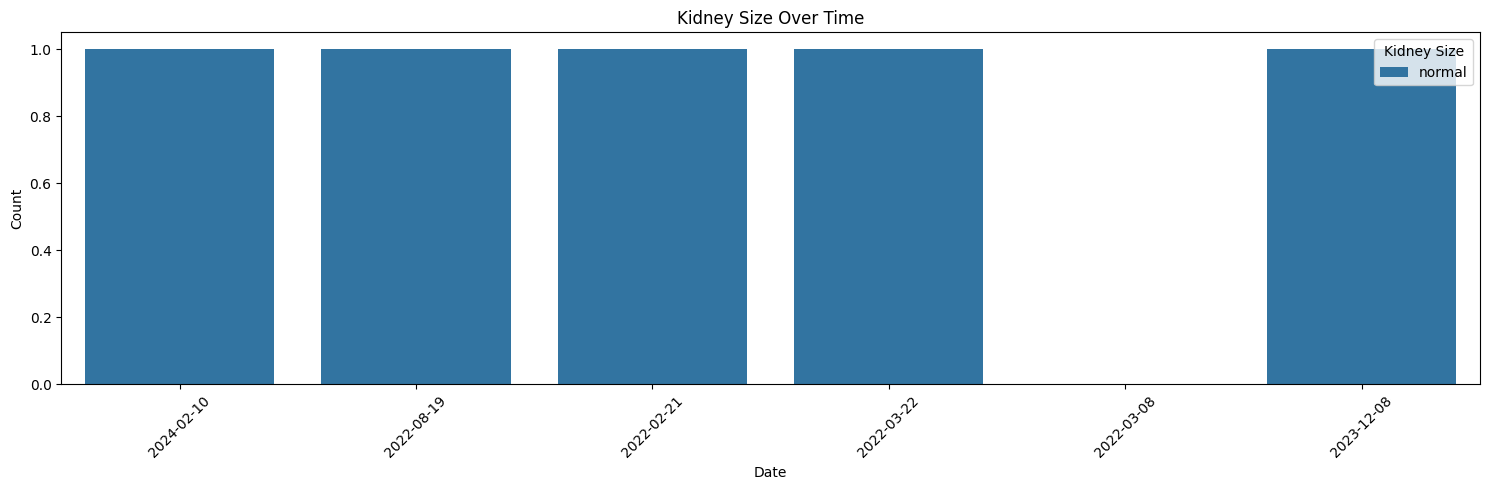

In [134]:
# Set up the plot
plt.figure(figsize=(15, 5))

# Plot each categorical column with respect to date

sns.countplot(data=new_df_cleaned, x='date', hue='kidneys_size')
plt.title(f'Kidney Size Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Kidney Size')

plt.tight_layout()
plt.show()

**Tabular Format for One Report**

In [136]:
import ast
import pandas as pd

data = ast.literal_eval(responses1[0])

try:
    flattened_data = flatten_dict(data)
    df = pd.DataFrame.from_dict(flattened_data, orient='index', columns=['value'])
    # Filter to include only rows with non-null values
    df_non_null = df[df['value'].notna()]
except Exception as e:  # Catch any unexpected errors
    print(f"An error occurred: {e}")

df_non_null

,value
date,10/02/2024
liver_size,normal
liver_echo-texture,normal
liver_intra hepatic biliary channels,dilated
gall bladder_visualized,False
gall bladder_desc,h/o hysterectomy
cbd_measurement(in mm),8.0
cbd_presence of stones (calculi),False
cbd_desc,no obvious focal lesion is seen intra-luminall...
pancreas_size,normal


**Organ Wise Tables for A Report**

In [144]:
# Split the DataFrame into separate tables for each organ
df_non_null = df_non_null[df_non_null.index != 'date']
organ_tables = {}
for index in df_non_null.index:
    organ_name = index.split('_')[0]  # Extract the organ name from the index
    if organ_name not in organ_tables:
      organ_tables[organ_name] = pd.DataFrame(columns=['value'])
    organ_tables[organ_name].loc[index] = df_non_null.loc[index]

In [145]:
for organ_name, organ_df in organ_tables.items():
    print(f"Organ: {organ_name}")
    print(organ_df)
    print("\n")

Organ: liver
                                        value
liver_size                             normal
liver_echo-texture                     normal
liver_intra hepatic biliary channels  dilated


Organ: gall bladder
                                    value
gall bladder_visualized             False
gall bladder_desc        h/o hysterectomy


Organ: cbd
                                                                              value
cbd_measurement(in mm)                                                          8.0
cbd_presence of stones (calculi)                                              False
cbd_desc                          no obvious focal lesion is seen intra-luminall...


Organ: pancreas
                        value
pancreas_size          normal
pancreas_echo-texture  normal
pancreas_contour       normal


Organ: spleen
                      value
spleen_size          normal
spleen_echo-texture  normal


Organ: kidneys
                                                   